In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from analyze_feature import analyze_feature

In [2]:
# Setting the style for the plots
sns.set_style("white", {'axes.grid' : False})

In [3]:
# Directory where the plots and PDF file will be saved
save_dir_path = 'output'

In [4]:
# Creating a random DataFrame

num_rows = 50

df = pd.DataFrame({
    'patient_id': np.array(range(1, num_rows + 1)).astype(str),
    'feature_1': np.random.randint(0, 1001, size=num_rows),
    'feature_2': np.random.randint(0, 1001, size=num_rows),
    'response': np.random.randint(0, 2, size=num_rows),
    'os_months': np.random.uniform(0, 100, size=num_rows),
    'os_event': np.random.randint(0, 2, size=num_rows),
    'pfs_months': np.random.uniform(0, 100, size=num_rows),
    'pfs_event': np.random.randint(0, 2, size=num_rows)
})

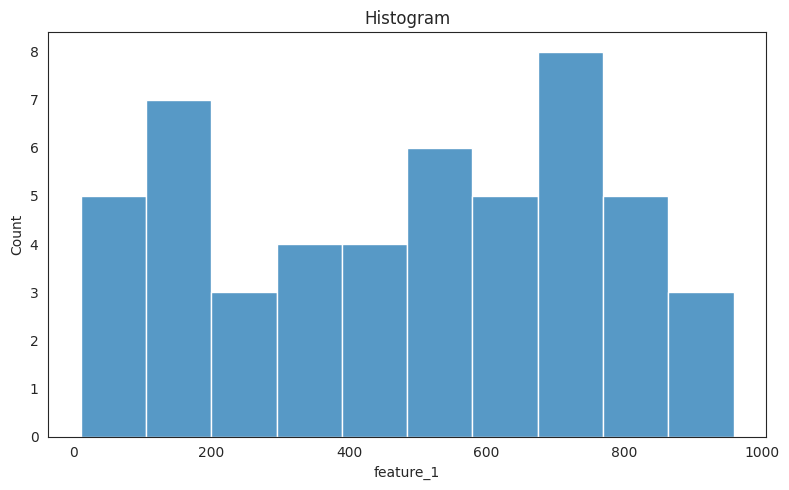

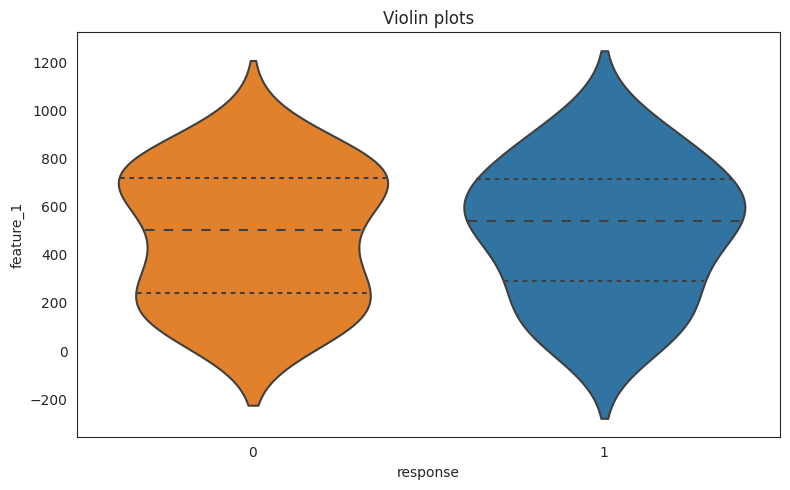

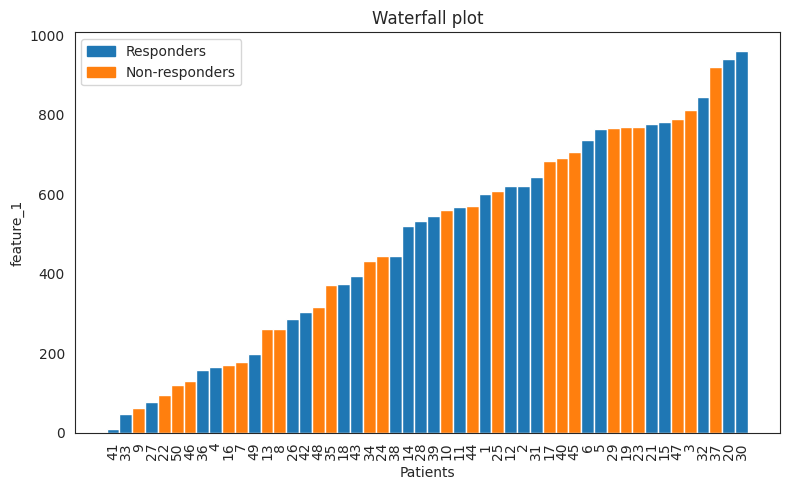

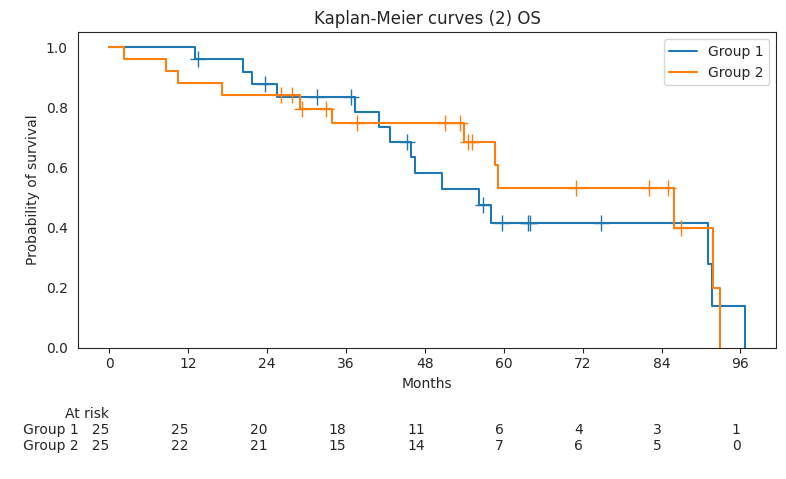

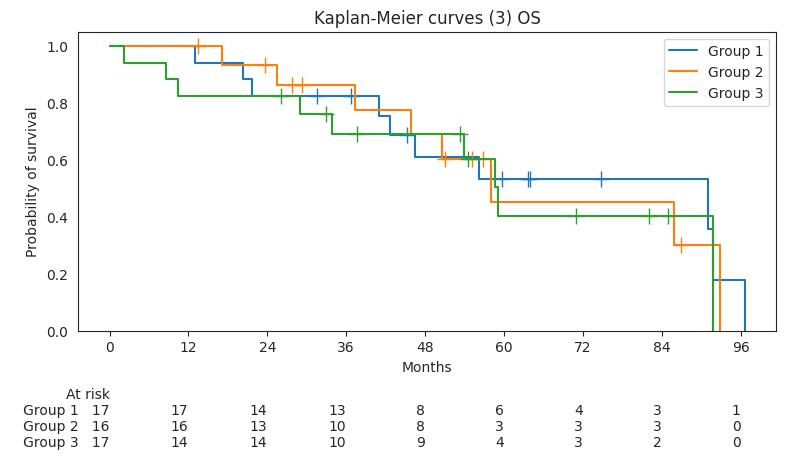

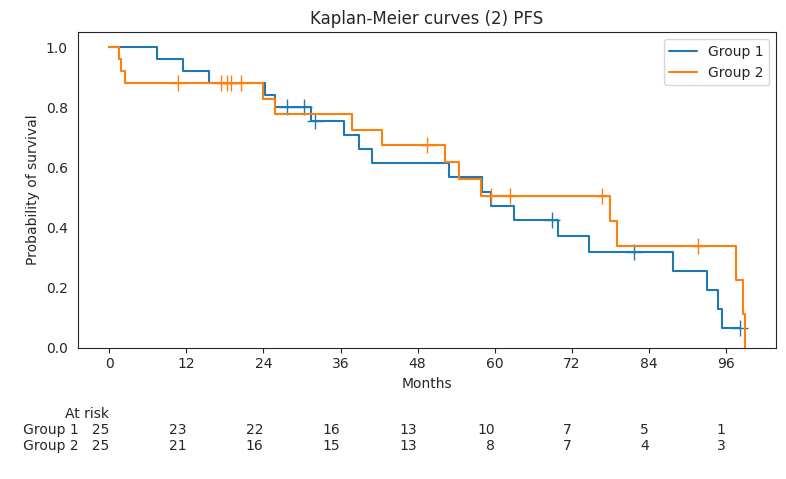

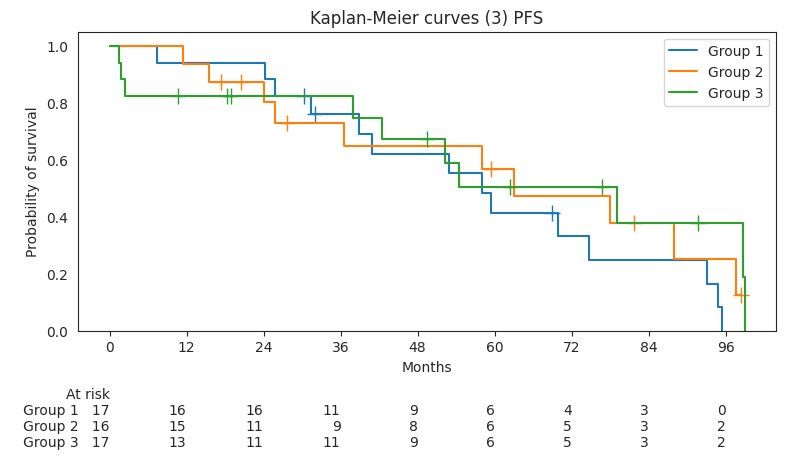

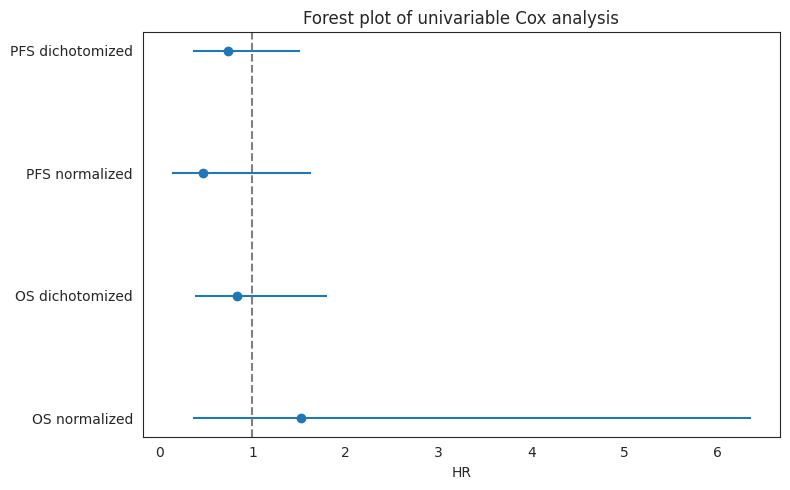

{'Mann-Whitney p-value': 0.8842044611753291, 'Logrank OS p-value': 0.6384900396930389, 'Logrank PFS p-value': 0.40591646632073375, 'Cox OS p-value': 0.5646570559461208, 'Cox OS HR': 1.0004429382941085, 'Cox OS assumption p-value': 0.8797035781288229, 'Cox PFS p-value': 0.23167045996511215, 'Cox PFS HR': 0.9991924075834286, 'Cox PFS assumption p-value': 0.06040441183052581, 'Cox OS dichotomized p-value': 0.6389905040536139, 'Cox OS dichotomized HR': 0.8307578423391871, 'Cox OS dichotomized assumption p-value': 0.8051765953055068, 'Cox PFS dichotomized p-value': 0.40764614625008555, 'Cox PFS dichotomized HR': 0.7405111213479054, 'Cox PFS dichotomized assumption p-value': 0.31541429582996133, 'Logistic regression LOOCV AUC': 0.3141025641025641}

 PDF saved in output/feature_1.pdf


In [5]:
analyze_feature(df, 'feature_1', save_dir_path)